[[ 0.          0.        ]
 [ 1.4         0.98544973]
 [ 2.8         0.33498815]
 [ 4.2        -0.87157577]
 [ 5.6        -0.63126664]]


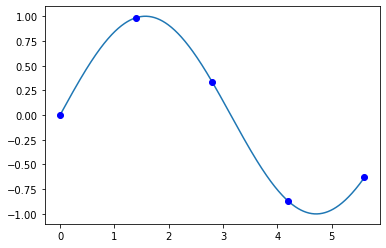

In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt
f = np.array([[0.01*x, math.sin(0.01*x)] for x in range(561)]) # For visualizing the "ideal" target function
S = np.array([[1.4*x, math.sin(1.4*x)] for x in range(5)]) # Training set, limited number of samples
print(S)
plt.plot(f[:,0], f[:,1]) # Target function, espposed to be continuous
x, y = S[:,0], S[:,1]
plt.plot(x, y, 'bo') # Training set, without noise, there is noise with real data
plt.show()

[-0.03648091]
degree: 0 Parameters: 1 Empirical risk: 2.2348158437049395


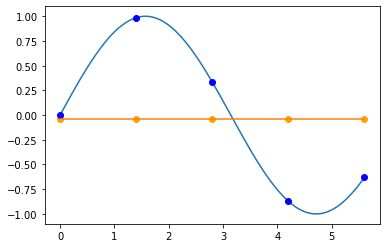

[ 0.58743085 -0.22282563]
degree: 1 Parameters: 2 Empirical risk: 1.2616511466737323


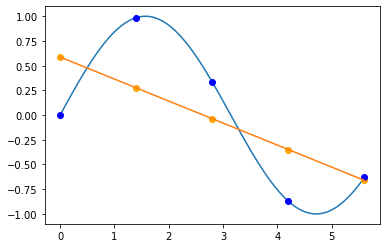

[ 0.29509034  0.19480367 -0.07457666]
degree: 2 Parameters: 3 Empirical risk: 0.9625307490510587


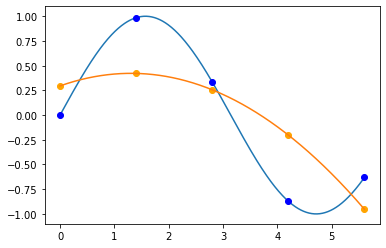

[-0.01318809  1.77289566 -0.86100124  0.09362197]
degree: 3 Parameters: 4 Empirical risk: 0.01217480375116441


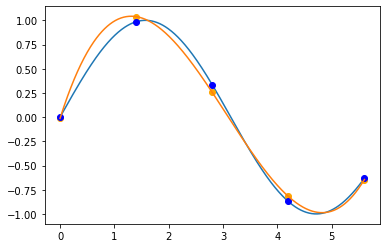

[ 6.66133815e-16  1.38039293e+00 -4.76909281e-01 -1.85216644e-02
  1.00128249e-02]
degree: 4 Parameters: 5 Empirical risk: 1.1463135028992828e-30


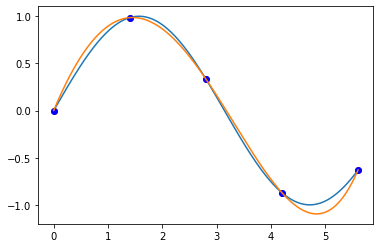

[-2.99760217e-15  2.05355026e+00 -1.47863151e+00  4.82339448e-01
 -9.22037286e-02  7.30118239e-03]
degree: 5 Parameters: 6 Empirical risk: 1.4840445779470285e-28
Under-dtermination, ovefitting.


C:\Users\quenot\Anaconda3\lib\site-packages\numpy\polynomial\_polybase.py:877: RankWarning: The fit may be poorly conditioned
  res = cls._fit(xnew, y, deg, w=w, rcond=rcond, full=full)


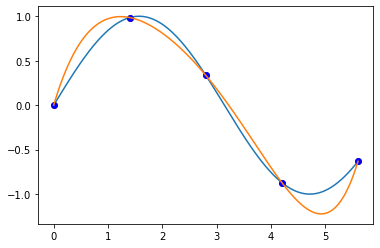

In [3]:
from numpy.polynomial import Polynomial
for n in range(6):
    p = Polynomial.fit(x, y, n) # Best approximation of data with polynom of degree n, see documentation
    print(p.convert().coef)
    py = p.linspace(5)[1]       # predicted values
    E = np.sum(np.square(py-y)) # square difference between predictions and expected values
    print("degree:", n, "Parameters:", n+1, "Empirical risk:", E)
    if n == 5: print("Under-dtermination, ovefitting.")
    plt.plot(f[:,0], f[:,1])
    plt.plot(x, py, 'o', color='orange')
    plt.plot(x, y, 'bo')
    a, b = p.linspace(561)
    plt.plot(a, b)
    plt.show()

degree: 5 Parameters: 6 Empirical risk: 1.9013396708572996e-28


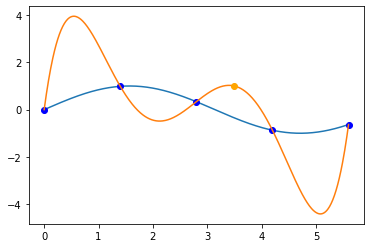

In [4]:
Sp = np.concatenate((S, np.array([[3.5, 1.0]]))) # add one "outlier"
xp, yp = Sp[:,0], Sp[:,1]
for n in range(5, 6):
    p = Polynomial.fit(xp, yp, n)
    py = p.linspace(5)[1]       # predicted values
    E = np.sum(np.square(py-y)) # square difference between predictions and expected values
    print("degree:", n, "Parameters:", n+1, "Empirical risk:", E) # Empirical risk on the training set without outlier
    plt.plot(f[:,0], f[:,1])
    plt.plot(x, y, 'bo')
    a, b = p.linspace(561)
    plt.plot(a, b)
    plt.plot(3.5, 1.0, 'o', color='orange')
    plt.show()